# Predicting University Admissions using Scikit-Learn

* Importing the required libraries
* Importing the dataset 
* Removing columns that are not required

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from jupyterthemes import jtplot
jtplot.style(theme='monokai',context='notebook',ticks=True,grid=False)

In [2]:
admission_df = pd.read_csv('C:/Users/Palla Anuraag Sharma/Downloads/Datacamp/Datasets/University Admission Pred Dataset/datasets_14872_228180_Admission_Predict.csv')

In [3]:
admission_df.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
94,95,303,99,3,2.0,2.5,7.66,0,0.36
42,43,313,107,2,2.5,2.0,8.50,1,0.53
233,234,304,100,2,2.5,3.5,8.07,0,0.64
351,352,325,110,4,3.5,4.0,8.67,1,0.73
295,296,317,100,2,3.0,2.5,8.57,0,0.68


In [4]:
admission_df = admission_df.drop(columns=['Serial No.'])

* Output variable is continuous Hence its a Regression Problem and not a Classification Problem

## Performing Exploratory Data Analysis

In [5]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


* Checking for null values 

In [6]:
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

- There is no missing data in the Dataframe
- Using Profile Report to get EDA 

In [7]:
from pandas_profiling import ProfileReport
report = ProfileReport(admission_df,title='EDA of Dataset')
report

In [8]:
admission_df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Chance_of_Admit_
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [10]:
university_df = admission_df.groupby(by='University_Rating').mean()
university_df

,GRE_Score,TOEFL_Score,SOP,LOR_,CGPA,Research,Chance_of_Admit_
University_Rating,,,,,,,
1,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


## Performing Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000255849D3848>,
      dtype=object)

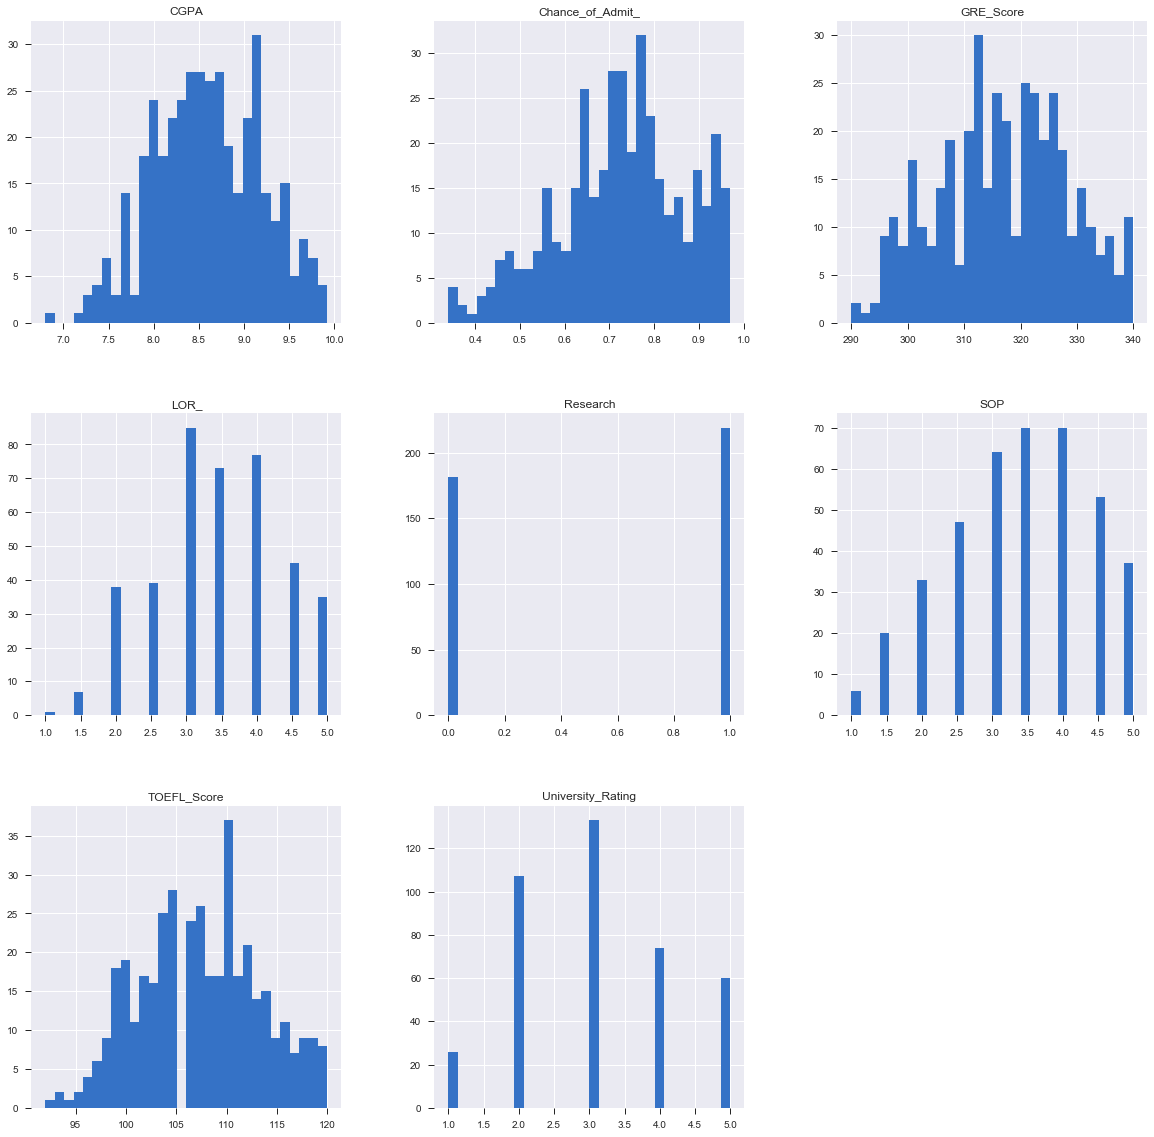

In [11]:
admission_df.hist(bins=30,figsize=(20,20))

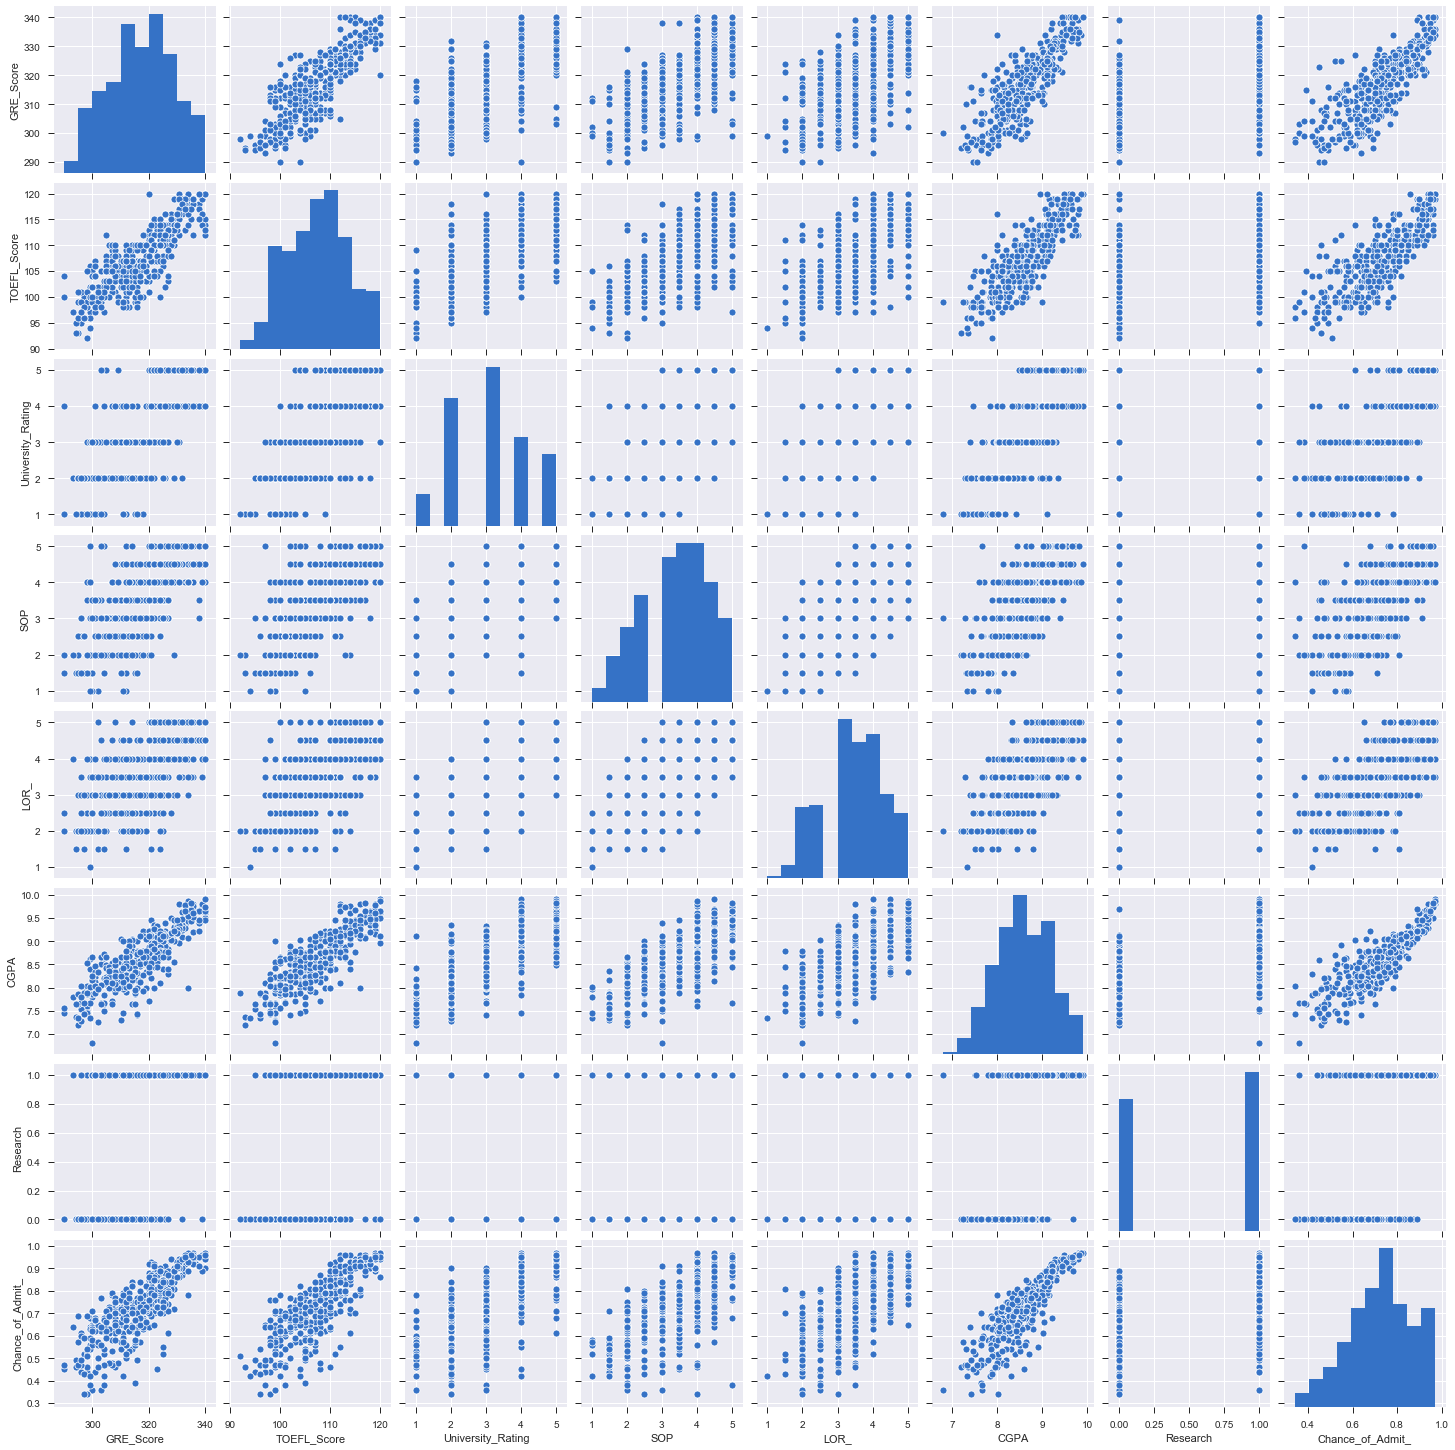

In [12]:
sns.pairplot(admission_df)

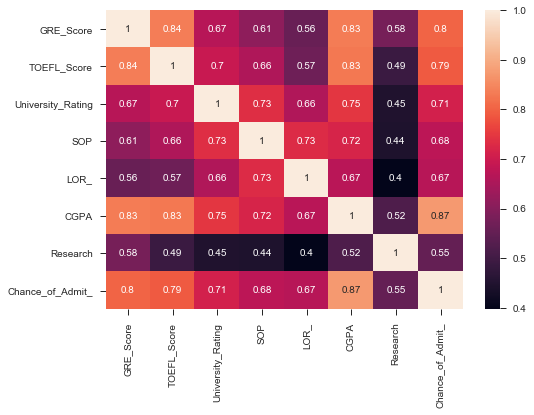

In [13]:
corr_matrix = admission_df.corr()
sns.heatmap(corr_matrix,annot=True)

## Creating Training and Testing Dataset

In [14]:
from sklearn.model_selection import train_test_split as tts

In [15]:
admission_df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR_', 'CGPA',
       'Research', 'Chance_of_Admit_'],
      dtype='object')

In [18]:
x = admission_df.drop(columns=['Chance_of_Admit_'])
y = admission_df[['Chance_of_Admit_']]

In [19]:
print('Shape of x: ',x.shape)
print('Shape of y: ',y.shape)

Shape of x:  (400, 7)
Shape of y:  (400, 1)


### Scaling the data before training to remove bias

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)

In [21]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [22]:
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.4,random_state=23)

In [23]:
print('Shape of x_train: ',x_train.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of x_test: ',x_test.shape)
print('Shape of y_test: ',y_test.shape)

Shape of x_train:  (240, 7)
Shape of y_train:  (240, 1)
Shape of x_test:  (160, 7)
Shape of y_test:  (160, 1)


## Making a Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [25]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Evaluating the model using Accuracy score and Mean Squared Error

In [26]:
from sklearn.metrics import mean_squared_error, accuracy_score
accuracy_lr = lr.score(x_test,y_test)
accuracy_lr

0.7927537159646224

## Making Decision Tree and Random Forest Models

* Decision Tree builds regression or classification models in the form of tree structure
* It breaks down a dataset into smaller subsets
* The end result is a tree with leaf node and decision node 

In [27]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
accuracy_dtr = dtr.score(x_test,y_test)
accuracy_dtr

0.6239638883793526

* Many decision trees make a Random Forest Regressor which is an ensemble model
* Prediction of each decision tree are averaged to get the value of the Random Forest Regressor
* Random forest fits no. of classifying decision trees on various subsamples
* Then uses averaging to improve the prediction accuracy and controls overfitting

In [28]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100,max_depth=10)
rfr.fit(x_train,y_train)
accuracy_rfr = rfr.score(x_test,y_test)
accuracy_rfr

0.7625654253531355

## KPI's for Regression Model
* Mean Absolute Error (MAE)
* Mean Sqaured Error (MSE)
* Root Mean Squared Error (RMSE)
* (R*2) - Coefficient of Determination
* Adjusted (R*2) 

## Calculating our Regression Model KPI's 

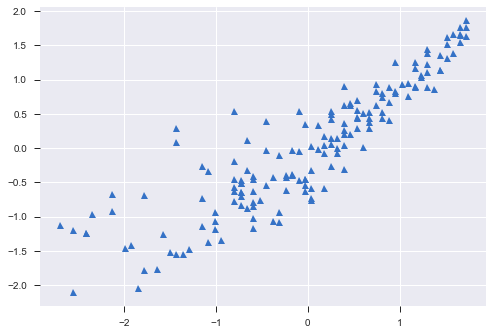

In [34]:
y_pred_lr = lr.predict(x_test)
plt.plot(y_test,y_pred_lr,'^',color='b')

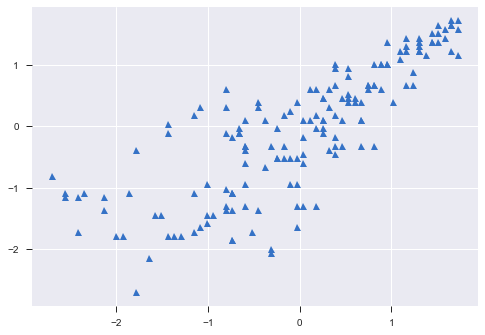

In [35]:
y_pred_dtr = dtr.predict(x_test)
plt.plot(y_test,y_pred_dtr,'^',color='b')

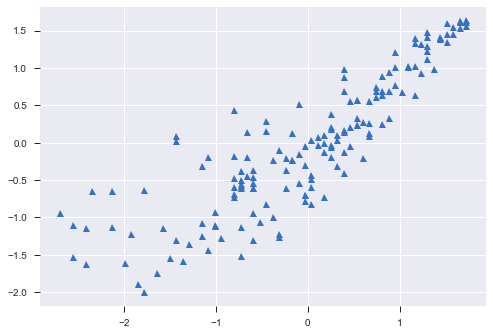

In [36]:
y_pred_rfr = rfr.predict(x_test)
plt.plot(y_test,y_pred_rfr,'^',color='b')

## Errors for Linear Regression 

In [41]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from math import sqrt

In [38]:
y_test_org = scaler_y.inverse_transform(y_test)

In [39]:
y_pred_lr_org = scaler_y.inverse_transform(y_pred_lr)

In [42]:
k = x_test.shape[1]
n = len(x_test)

In [47]:
RMSE   = float(format(np.sqrt(mean_squared_error(y_test_org,y_pred_lr_org)),'.3f'))
MSE    = mean_squared_error(y_test_org,y_pred_lr_org)
MAE    = mean_absolute_error(y_test_org,y_pred_lr_org)
r2     = r2_score(y_test_org,y_pred_lr_org)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
print('RMSE = ',RMSE,'MSE = ',MSE,'MAE = ',MAE,'R2 SCORE = ',r2,'ADJ_R2 = ',adj_r2)

RMSE =  0.069 MSE =  0.00475318623834921 MAE =  0.047802113581398006 R2 SCORE =  0.7927537159646225 ADJ_R2 =  0.7832094791998354


## Errors for Decision Tree Regressor

In [48]:
y_pred_dtr_org = scaler_y.inverse_transform(y_pred_dtr)

In [49]:
RMSE   = float(format(np.sqrt(mean_squared_error(y_test_org,y_pred_dtr_org)),'.3f'))
MSE    = mean_squared_error(y_test_org,y_pred_dtr_org)
MAE    = mean_absolute_error(y_test_org,y_pred_dtr_org)
r2     = r2_score(y_test_org,y_pred_dtr_org)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
print('RMSE = ',RMSE,'MSE = ',MSE,'MAE = ',MAE,'R2 SCORE = ',r2,'ADJ_R2 = ',adj_r2)

RMSE =  0.093 MSE =  0.008624375 MAE =  0.0684375 R2 SCORE =  0.6239638883793526 ADJ_R2 =  0.606646435870507


## Errors for Random Forest Regressor 

In [50]:
y_pred_rfr_org = scaler_y.inverse_transform(y_pred_rfr)

In [51]:
RMSE   = float(format(np.sqrt(mean_squared_error(y_test_org,y_pred_rfr_org)),'.3f'))
MSE    = mean_squared_error(y_test_org,y_pred_rfr_org)
MAE    = mean_absolute_error(y_test_org,y_pred_rfr_org)
r2     = r2_score(y_test_org,y_pred_rfr_org)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
print('RMSE = ',RMSE,'MSE = ',MSE,'MAE = ',MAE,'R2 SCORE = ',r2,'ADJ_R2 = ',adj_r2)

RMSE =  0.074 MSE =  0.0054455536222165705 MAE =  0.05154107500830478 R2 SCORE =  0.7625654253531355 ADJ_R2 =  0.7516309383628194
